In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [92]:
sep_coins = cv2.imread('../../DATA/pennies.jpg')

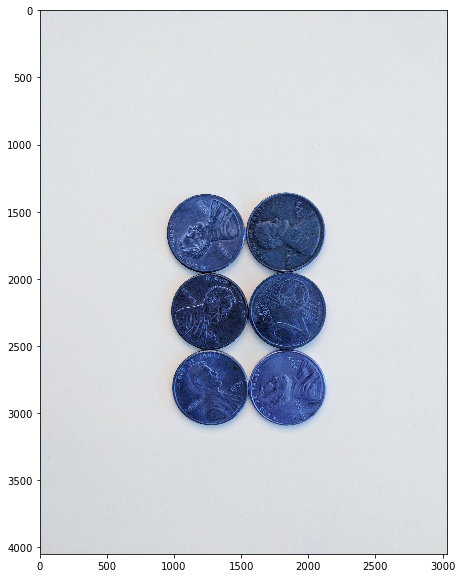

In [4]:
display(sep_coins)

In [5]:
# Median blur
# Grayscale
# Binary Threshold
# Find Contours

In [6]:
# Median blur
sep_blur = cv2.medianBlur(sep_coins,25)

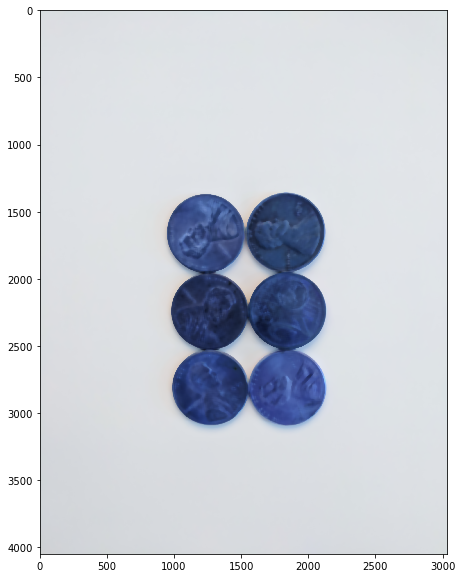

In [7]:
display(sep_blur)

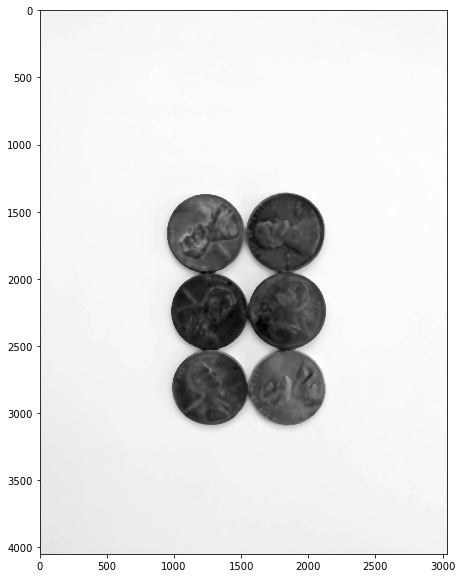

In [10]:
# Grayscale
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

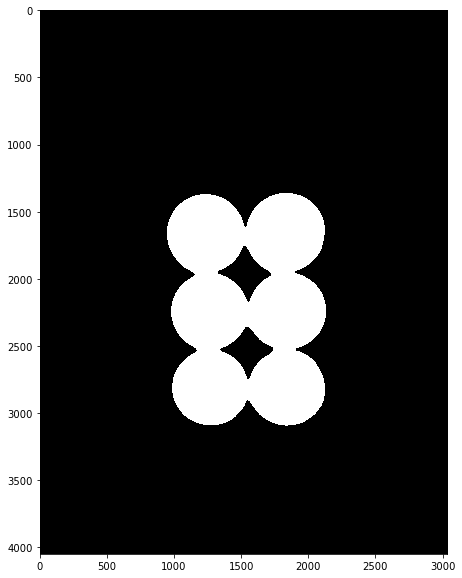

In [13]:
# Binary Threshold
ret, sep_thresh= cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)
display(sep_thresh)

In [14]:
# Find Contours
image,contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [15]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

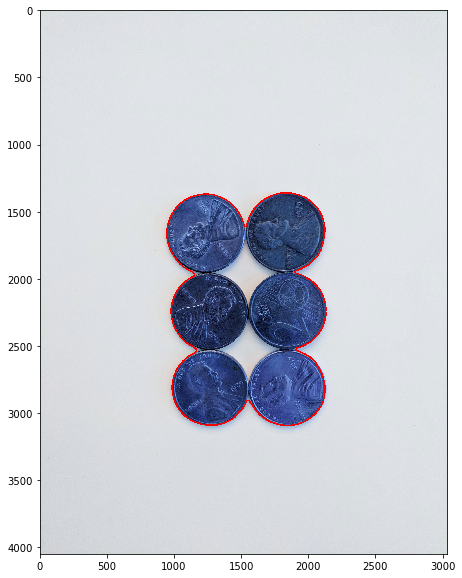

In [16]:
display(sep_coins)

**WhaterSead Part 2**

In [3]:
img = cv2.imread('../../DATA/pennies.jpg')

In [4]:
#Aplly really strong blur (recomended 35 for this image):
img = cv2.medianBlur(img,35)

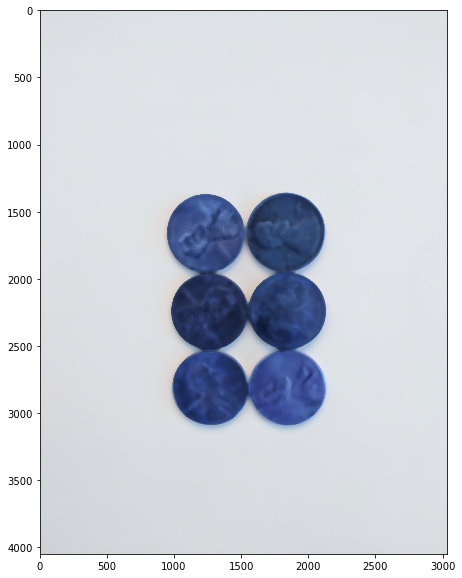

In [5]:
display(img)

In [11]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

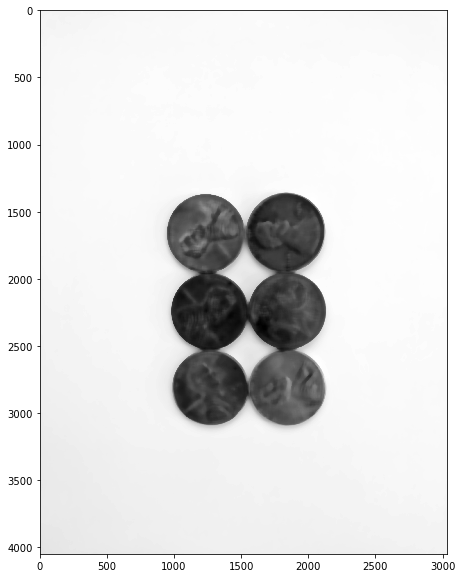

In [12]:
display(gray)

In [17]:
#Apply threshold
#ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

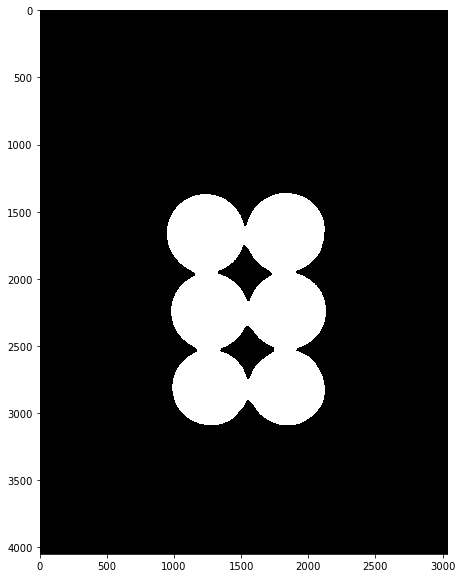

In [18]:
display(thresh)

In [ ]:
#NOISE REMOVAL (OPTIONAL)

In [19]:
kernel = np.ones((3,3),np.uint8)

In [20]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [21]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

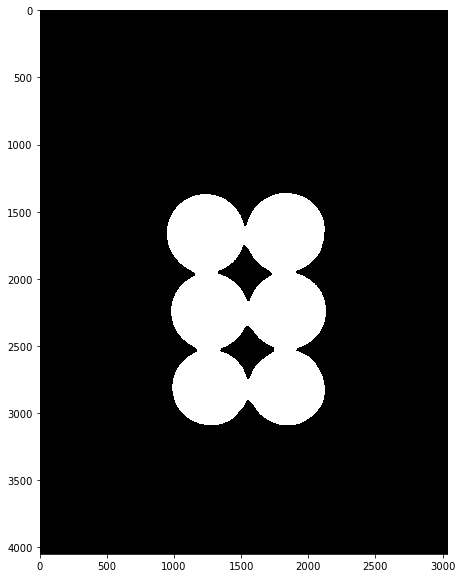

In [22]:
display(opening)

In [41]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [23]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

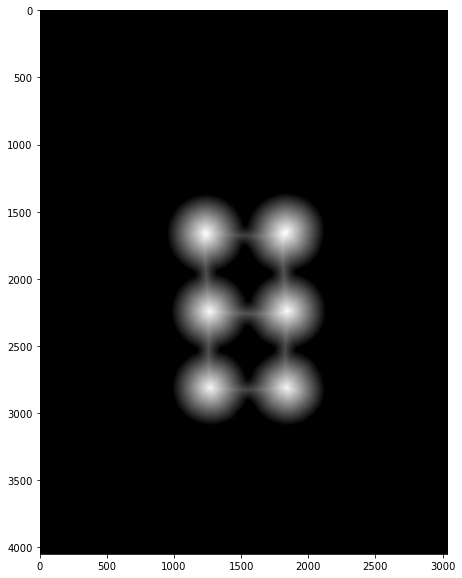

In [72]:
display(dist_transform)

In [73]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

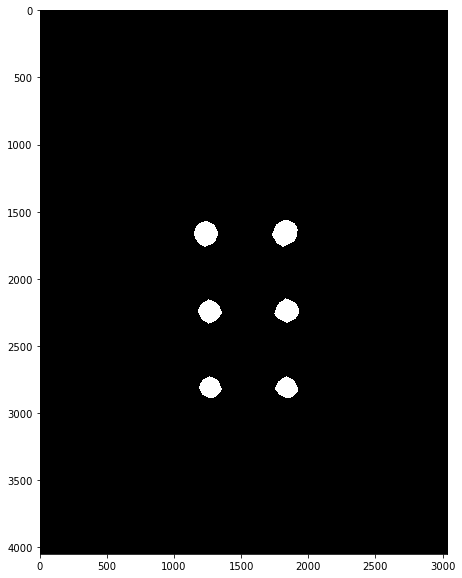

In [74]:
display(sure_fg)

In [75]:
sure_fg = np.uint8(sure_fg)

In [76]:
unknown = cv2.subtract(sure_bg,sure_fg)

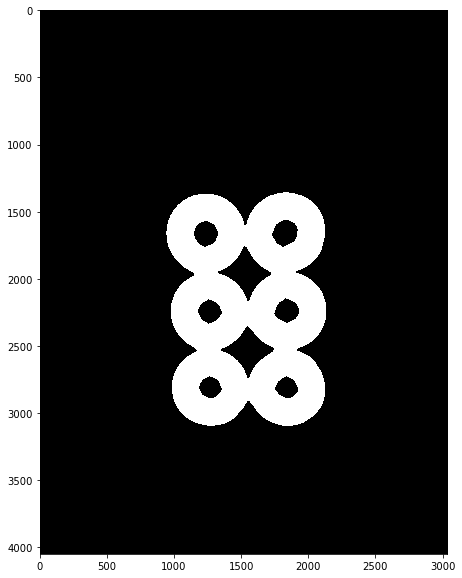

In [77]:
display(unknown)

In [78]:
#Creating the label markers for the whatershead algorithm, getting the markers
ret, markers = cv2.connectedComponents(sure_fg)
 

In [81]:
# If we check out the markers, these are actually contains zeros
markers = markers+1

In [83]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [85]:
markers[unknown==255] = 0

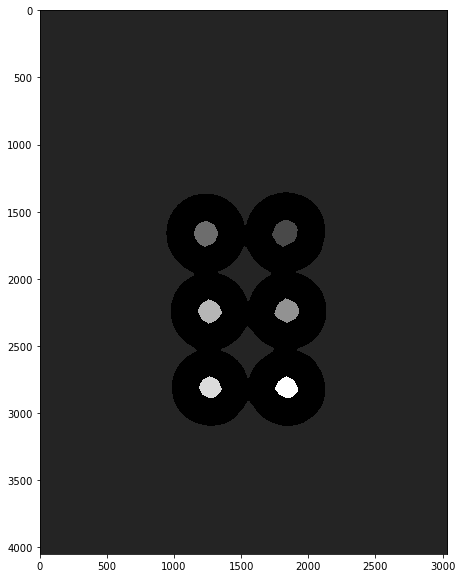

In [86]:
display(markers)

In [89]:
#The final step is apply the wathershed algorithm markers
markers = cv2.watershed(img,markers)

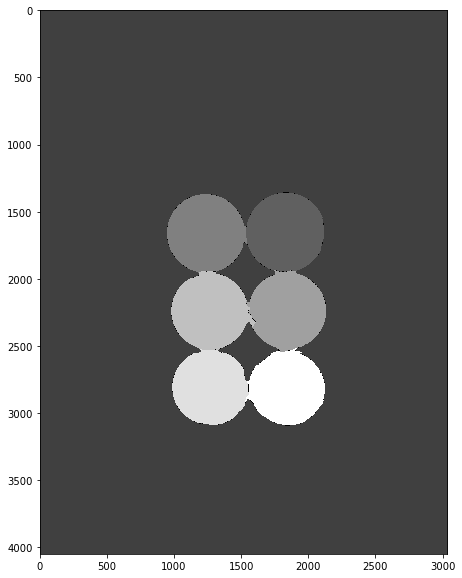

In [90]:
display(markers)

In [93]:
# Find Contours
image,contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

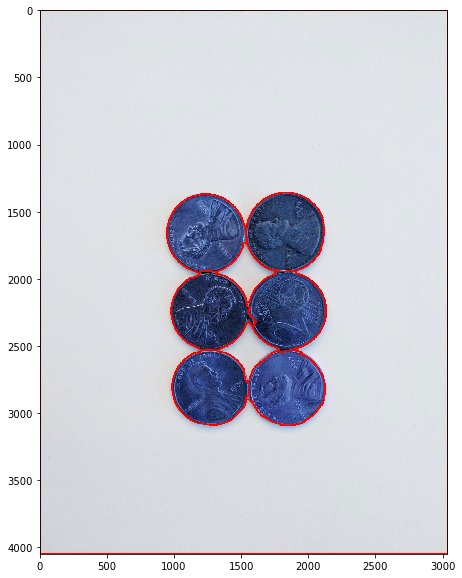

In [94]:
display(sep_coins)